# Football Match Result Prediction

https://www.kaggle.com/competitions/football-match-probability-prediction/overview

## Import Data

In [1]:
# Import packages
import numpy as np
import pandas as pd
import os, os.path
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import data
train_path = os.path.abspath(os.getcwd())+"/train.csv"
train_df = pd.read_csv(train_path)
scores_path = os.path.abspath(os.getcwd())+"/train_target_and_scores.csv"
scores_df = pd.read_csv(scores_path)
test_path = os.path.abspath(os.getcwd())+"/test.csv"
test_df = pd.read_csv(test_path)

/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
train_df.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [4]:
test_df.head()

,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,team home,team away,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,team home,team away,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0
3,17715493,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,21036670.0,1553238.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
4,17715492,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,3618158.0,37400444.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0


## Exploratory Data Analysis

<AxesSubplot:xlabel='is_cup', ylabel='count'>

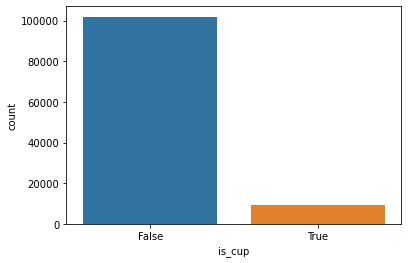

In [5]:
sns.countplot(x='is_cup', data=train_df)

<AxesSubplot:xlabel='target', ylabel='count'>

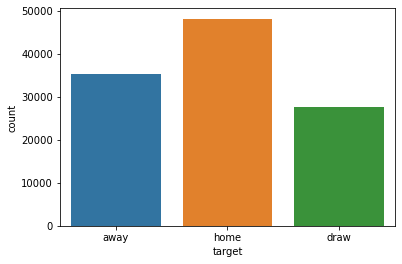

In [6]:
sns.countplot(x='target', data=scores_df)

## Data Preprocessing

In [7]:
train_df.set_index(keys='id', inplace=True)
test_df.set_index(keys='id', inplace=True)

In [8]:
# do preprocessing together so we combine train and test first.

realizing there is an extra column 'target' has to be dropped because the test dataset does not have it

In [9]:
train_df.drop(['target'], axis=1, inplace=True)

In [10]:
train_n = train_df.shape[0]
print(train_df.shape,test_df.shape)

(110938, 188) (72711, 188)


In [11]:
all_df = pd.concat((train_df, test_df))
all_df

,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
11906497,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,2019-11-10 18:30:00,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
11984383,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,2019-11-24 01:00:00,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
11983301,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,2019-11-21 01:30:00,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
11983471,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,2019-11-28 01:00:00,2019-11-23 03:10:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
11883005,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,2019-11-27 18:00:00,2019-11-24 01:00:00,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18450246,team home,team away,2021-11-30 22:00:00,Segunda Division,776,False,185004.0,37604899.0,2021-11-24 20:15:00,2021-11-18 01:15:00,...,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0
18164889,team home,team away,2021-11-30 22:15:00,Superliga,636,False,212417.0,37600717.0,2021-11-25 00:30:00,2021-11-20 22:15:00,...,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0
18449018,team home,team away,2021-11-30 22:30:00,Friendly International Women,1363,False,37429080.0,37428117.0,2021-10-23 21:00:00,2021-09-22 00:00:00,...,1363.0,1363.0,1126.0,1126.0,1126.0,1126.0,1126.0,1126.0,1363.0,1363.0


In [12]:
# convert is_cup to a binary variable
all_df['is_cup'] = all_df['is_cup'].map({False: 0, True: 1})
# convert target results to 0,1,2
scores_df = scores_df['target'].map({'home': 0, 'draw': 1, 'away': 2})

In [13]:
# remove all the coach and dates, team names and league name as they are not useful in training

In [14]:
all_df.drop(['home_team_name', 'away_team_name', 'league_name'], axis=1, inplace=True)
all_df.drop(all_df.filter(regex='date').columns, axis=1, inplace = True)
all_df.drop(all_df.filter(regex='coach').columns, axis=1, inplace = True)

In [15]:
# find the NaN values on each row

In [16]:
all_df.shape

(183649, 142)

In [17]:
pd.set_option('display.max_rows', None)
all_df.isnull().sum(axis = 0)

league_id                                   0
is_cup                                      1
home_team_history_is_play_home_1         1657
home_team_history_is_play_home_2         3533
home_team_history_is_play_home_3         5451
home_team_history_is_play_home_4         7364
home_team_history_is_play_home_5         9329
home_team_history_is_play_home_6        11333
home_team_history_is_play_home_7        13380
home_team_history_is_play_home_8        15485
home_team_history_is_play_home_9        17538
home_team_history_is_play_home_10       19623
home_team_history_is_cup_1               1719
home_team_history_is_cup_2               3657
home_team_history_is_cup_3               5608
home_team_history_is_cup_4               7577
home_team_history_is_cup_5               9632
home_team_history_is_cup_6              11711
home_team_history_is_cup_7              13868
home_team_history_is_cup_8              16101
home_team_history_is_cup_9              18211
home_team_history_is_cup_10       

In [18]:
# is_cup
for col in all_df.filter(regex='is_cup', axis=1).columns:
    all_df[col] = all_df[col].fillna(0)
# rating
for col in all_df.filter(regex='rating', axis=1).columns:
    all_df[col] = all_df[col].fillna(all_df[col].mean())
# is play home
for col in all_df.filter(regex='is_play_home', axis=1).columns:
    all_df[col] = all_df[col].fillna(0.5)
# league
for col in all_df.filter(regex='league_id', axis=1).columns:
    all_df[col] = all_df[col].fillna(0)
# goal
for col in all_df.filter(regex='goal', axis=1).columns:
    all_df[col] = all_df[col].fillna(all_df[col].mean())


In [19]:
# reseparate train and test

In [20]:
clean_train_df = all_df[:train_n].to_numpy()
train_label = scores_df.to_numpy()
clean_test_df = all_df[train_n:].to_numpy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(clean_train_df, train_label, test_size=0.3, random_state=42)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Training

In [23]:
# import packages

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [24]:
# Logistic Regression

lr_clf = LogisticRegression(multi_class='multinomial', solver="lbfgs")
lr_score = cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='accuracy')
lr_clf.fit(X_train, y_train)
print("Logistic Regression, Model Accuracy (%):", lr_score.mean()*100)

Logistic Regression, Model Accuracy (%): 49.43597166777326


In [25]:
# Ridge Regression

ridge_clf = RidgeClassifier()
ridge_score = cross_val_score(ridge_clf, X_train, y_train, cv=5, scoring='accuracy')
ridge_clf.fit(X_train, y_train)
print("Ridge Regression, Model Accuracy (%):", ridge_score.mean()*100)

Ridge Regression, Model Accuracy (%): 49.411504390221


In [26]:
#Decision Tree

tree_clf = DecisionTreeClassifier()
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')
tree_clf.fit(X_train, y_train)
print("Decision Tree, Model Accuracy (%):", tree_score.mean()*100)

Decision Tree, Model Accuracy (%): 38.70144809199443


In [27]:
#KNeighbor

neigh_clf = KNeighborsClassifier()
neigh_score = cross_val_score(neigh_clf, X_train, y_train, cv=5, scoring='accuracy')
neigh_clf.fit(X_train, y_train)
print("KNN, Model Accuracy (%):", neigh_score.mean()*100)

KNN, Model Accuracy (%): 41.5859679045206


In [28]:
#Randomforest

forest_clf = RandomForestClassifier()
forest_score = cross_val_score(forest_clf, X_train, y_train, cv=5, scoring='accuracy')
forest_clf.fit(X_train, y_train)
print("Random Forest, Model Accuracy (%)", forest_score.mean()*100)

Random Forest, Model Accuracy (%) 48.533276630011976


In [29]:
#Adaboost

ada_clf = AdaBoostClassifier()
ada_score = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='accuracy')
ada_clf.fit(X_train, y_train)
print("Adaboost, Model Accuracy (%)", ada_score.mean()*100)

Adaboost, Model Accuracy (%) 48.60924964555864


## Results and Evaluation
### Model Evaluation

In [30]:
# import packages

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
def model_evaluation(model, model_name, X=X_test, y_true=y_test):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    result = {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1':f1
    }

    return result, cm

In [32]:
# Create Dataframe for performance recording
model_performance = pd.DataFrame(columns=['model','accuracy','precision','recall','f1'])

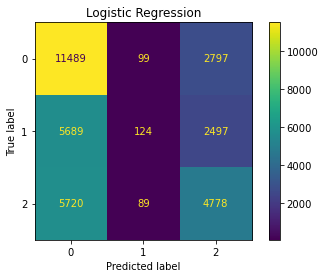

,model,accuracy,precision,recall,f1
0,Logistic Regression,0.492488,0.466998,0.492488,0.420702


In [33]:
# Ridge Regression
lr_result, lr_cm = model_evaluation(lr_clf, "Logistic Regression")
model_performance = model_performance.append(lr_result, ignore_index=True)
lr_disp = ConfusionMatrixDisplay(lr_cm)
lr_disp.plot()
plt.title('Logistic Regression')
plt.show();

display(model_performance)

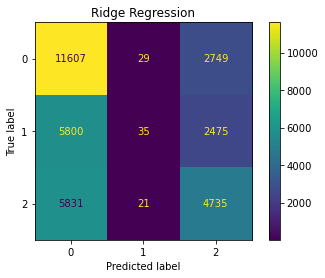

,model,accuracy,precision,recall,f1
0,Logistic Regression,0.492488,0.466998,0.492488,0.420702
1,Ridge Regression,0.492068,0.469936,0.492068,0.415384


In [34]:
# Ridge Regression
ridge_result, ridge_cm = model_evaluation(ridge_clf, "Ridge Regression")
model_performance = model_performance.append(ridge_result, ignore_index=True)
ridge_disp = ConfusionMatrixDisplay(ridge_cm)
ridge_disp.plot()
plt.title('Ridge Regression')
plt.show();

display(model_performance)

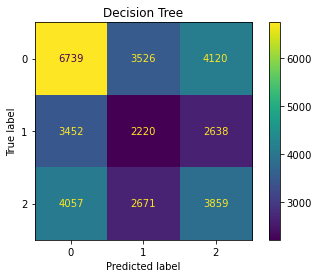

,model,accuracy,precision,recall,f1
0,Logistic Regression,0.492488,0.466998,0.492488,0.420702
1,Ridge Regression,0.492068,0.469936,0.492068,0.415384
2,Decision Tree,0.385133,0.385904,0.385133,0.385511


In [35]:
# Decision Tree
tree_result, tree_cm = model_evaluation(tree_clf, "Decision Tree")
model_performance = model_performance.append(tree_result, ignore_index=True)
tree_disp = ConfusionMatrixDisplay(tree_cm)
tree_disp.plot()
plt.title('Decision Tree')
plt.show();

display(model_performance)

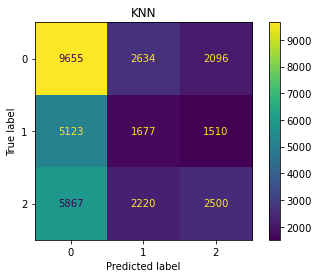

,model,accuracy,precision,recall,f1
0,Logistic Regression,0.492488,0.466998,0.492488,0.420702
1,Ridge Regression,0.492068,0.469936,0.492068,0.415384
2,Decision Tree,0.385133,0.385904,0.385133,0.385511
3,KNN,0.415600,0.396487,0.415600,0.389962


In [36]:
# KNN
neigh_result, neigh_cm = model_evaluation(neigh_clf, "KNN")
model_performance = model_performance.append(neigh_result, ignore_index=True)
neigh_disp = ConfusionMatrixDisplay(neigh_cm)
neigh_disp.plot()
plt.title('KNN')
plt.show();

display(model_performance)

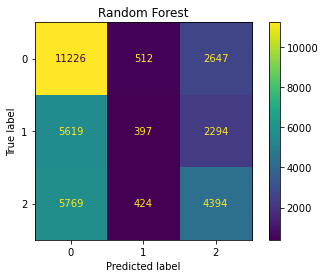

,model,accuracy,precision,recall,f1
0,Logistic Regression,0.492488,0.466998,0.492488,0.420702
1,Ridge Regression,0.492068,0.469936,0.492068,0.415384
2,Decision Tree,0.385133,0.385904,0.385133,0.385511
3,KNN,0.415600,0.396487,0.415600,0.389962
4,Random Forest,0.481251,0.438652,0.481251,0.423159


In [37]:
#Randomforest
forest_result, forest_cm = model_evaluation(forest_clf, "Random Forest")
model_performance = model_performance.append(forest_result, ignore_index=True)
forest_disp = ConfusionMatrixDisplay(forest_cm)
forest_disp.plot()
plt.title('Random Forest')
plt.show();

display(model_performance)

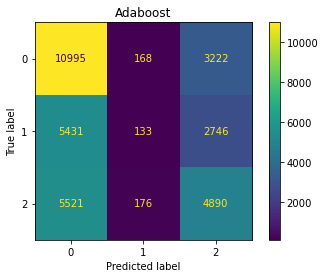

,model,accuracy,precision,recall,f1
0,Logistic Regression,0.492488,0.466998,0.492488,0.420702
1,Ridge Regression,0.492068,0.469936,0.492068,0.415384
2,Decision Tree,0.385133,0.385904,0.385133,0.385511
3,KNN,0.415600,0.396487,0.415600,0.389962
4,Random Forest,0.481251,0.438652,0.481251,0.423159
5,Adaboost,0.481281,0.429409,0.481281,0.414227


In [38]:
#Adaboost
ada_result, ada_cm = model_evaluation(ada_clf, "Adaboost")
model_performance = model_performance.append(ada_result, ignore_index=True)
ada_disp = ConfusionMatrixDisplay(ada_cm)
ada_disp.plot()
plt.title('Adaboost')
plt.show();

display(model_performance)

In [39]:
# Result

model_performance = model_performance.set_index('model')
display(model_performance)

,accuracy,precision,recall,f1
model,,,,
Logistic Regression,0.492488,0.466998,0.492488,0.420702
Ridge Regression,0.492068,0.469936,0.492068,0.415384
Decision Tree,0.385133,0.385904,0.385133,0.385511
KNN,0.415600,0.396487,0.415600,0.389962
Random Forest,0.481251,0.438652,0.481251,0.423159
Adaboost,0.481281,0.429409,0.481281,0.414227


### Features Evaluation

In [50]:
feature_importance = pd.DataFrame(columns=['Decision Tree','Decision Tree Value',
                                           'Random Forest', 'Random Forest Value',
                                           'Adaboost', 'Adaboost Value'])

In [51]:
# Find the most important features of different algorithms

all_df_col = all_df.columns.to_numpy()

tree_top10 = tree_clf.feature_importances_.argsort()[-10:][::-1]
tree_top10_features = all_df_col[tree_top10]
feature_importance['Decision Tree'] = tree_top10_features
feature_importance['Decision Tree Value'] = np.sort(tree_clf.feature_importances_)[::-1][:10]

forest_top10 = forest_clf.feature_importances_.argsort()[-10:][::-1]
forest_top10_features = all_df_col[forest_top10]
feature_importance['Random Forest'] = forest_top10_features
feature_importance['Random Forest Value'] = np.sort(forest_clf.feature_importances_)[::-1][:10]

ada_top10 = ada_clf.feature_importances_.argsort()[-10:][::-1]
ada_top10_features = all_df_col[ada_top10]
feature_importance['Adaboost'] = ada_top10_features
feature_importance['Adaboost Value'] = np.sort(ada_clf.feature_importances_)[::-1][:10]

In [52]:
display(feature_importance)

,Decision Tree,Decision Tree Value,Random Forest,Random Forest Value,Adaboost,Adaboost Value
0,away_team_history_rating_1,0.024429,away_team_history_rating_1,0.017478,away_team_history_rating_1,0.08
1,home_team_history_rating_2,0.022490,home_team_history_opponent_rating_1,0.016912,home_team_history_rating_1,0.06
2,home_team_history_rating_1,0.021838,home_team_history_rating_1,0.016758,away_team_history_opponent_rating_2,0.06
3,home_team_history_opponent_rating_1,0.021479,home_team_history_rating_2,0.016658,home_team_history_opponent_rating_4,0.04
4,home_team_history_rating_3,0.019779,home_team_history_opponent_rating_2,0.016625,home_team_history_opponent_rating_3,0.04
5,away_team_history_opponent_rating_2,0.019615,away_team_history_opponent_rating_1,0.016465,home_team_history_opponent_rating_2,0.04
6,home_team_history_opponent_rating_2,0.018015,away_team_history_rating_2,0.016116,home_team_history_rating_6,0.04
7,away_team_history_rating_2,0.017880,away_team_history_opponent_rating_2,0.015802,home_team_history_rating_5,0.04
8,away_team_history_opponent_rating_4,0.017560,home_team_history_rating_3,0.015310,away_team_history_rating_4,0.04
9,home_team_history_opponent_rating_3,0.017315,home_team_history_opponent_rating_3,0.014967,home_team_history_opponent_goal_2,0.02


## Football Matches Prediction 

### European Champions League 2021

Manchester City 2–0	Paris Saint-Germain, Chelsea 2–0	Real Madrid, Manchester City 0–1	Chelsea

In [59]:
def result_translate(array):
    result = []
    for i in array:
        if i == 0:
            result.append('Home Win')
        elif i == 1:
            result.append('Draw')
        elif i == 2:
            result.append('Away Win')
    return result

In [60]:
test_df[test_df['league_id']==2].head(3)

,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
18017198,team home,team away,2021-05-04 19:00:00,Champions League,2,True,455361.0,455358.0,2021-05-01 11:30:00,2021-04-28 19:00:00,...,301.0,2.0,301.0,307.0,301.0,2.0,301.0,2.0,301.0,301.0
18017200,team home,team away,2021-05-05 19:00:00,Champions League,2,True,523937.0,407775.0,2021-05-01 16:30:00,2021-04-27 19:00:00,...,564.0,2.0,564.0,564.0,564.0,2.0,564.0,2.0,564.0,564.0
18061925,team home,team away,2021-05-29 19:00:00,Champions League,2,True,455361.0,523937.0,2021-05-23 15:00:00,2021-05-18 18:00:00,...,8.0,8.0,24.0,8.0,8.0,2.0,8.0,2.0,8.0,8.0


In [70]:
ecl_ind = test_df[test_df['league_id']==2].head(3).index.to_numpy()
ecl_df = all_df.loc[ecl_ind, :].to_numpy()
X_test_ecl = sc.transform(ecl_df)

print('Actual Result: Home Win, Home Win, Away Win')
print("Logistic Regression, Predicted Result:", result_translate(lr_clf.predict(X_test_ecl)))
print("Random Forest, Predicted Result:", result_translate(forest_clf.predict(X_test_ecl)))
print("Adaboost Forest, Predicted Result:", result_translate(ada_clf.predict(X_test_ecl)))

Actual Result: Home Win, Home Win, Away Win
Logistic Regression, Predicted Result: ['Home Win', 'Home Win', 'Home Win']
Random Forest, Predicted Result: ['Home Win', 'Away Win', 'Home Win']
Adaboost Forest, Predicted Result: ['Home Win', 'Home Win', 'Home Win']


### English Premier League

Chelsea 1-1 Man Utd, 
Newcastle 1-0 Norwich, 
Leeds 1-1 Crystal Palace

In [56]:
test_df[test_df['league_id']==8].tail(3)

,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
18138776,team home,team away,2021-11-28 16:30:00,Premier League,8,False,523937.0,645.0,2021-11-23 20:00:00,2021-11-20 12:30:00,...,2.0,8.0,8.0,2.0,8.0,8.0,2.0,8.0,8.0,2.0
18140375,team home,team away,2021-11-30 19:30:00,Premier League,8,False,523911.0,524237.0,2021-11-27 12:30:00,2021-11-20 15:00:00,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,27.0,8.0
18140370,team home,team away,2021-11-30 20:15:00,Premier League,8,False,1533119.0,460451.0,2021-11-27 17:30:00,2021-11-21 16:30:00,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


In [83]:
epl_ind = test_df[test_df['league_id']==8].head(3).index.to_numpy()
epl_df = all_df.loc[epl_ind, :].to_numpy()
X_test_epl = sc.transform(epl_df)

print('Actual Result: Draw, Home Win, Draw')
print("Logistic Regression, Predicted Result:", result_translate(lr_clf.predict(X_test_epl)))
print("Random Forest, Predicted Result:", result_translate(forest_clf.predict(X_test_epl)))
print("Adaboost Forest, Predicted Result:", result_translate(ada_clf.predict(X_test_epl)))

Actual Result: Draw, Home Win, Draw
Logistic Regression, Predicted Result: ['Away Win', 'Home Win', 'Home Win']
Random Forest, Predicted Result: ['Away Win', 'Home Win', 'Home Win']
Adaboost Forest, Predicted Result: ['Away Win', 'Home Win', 'Home Win']


### La Liga

Cádiz CF	1:4	Atlético de Madrid,
Real Madrid	2:1	Sevilla FC, 
Osasuna	1:1	Elche CF

In [72]:
test_df[test_df['league_id']==564].tail(3)

,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
18165847,team home,team away,2021-11-28 17:30:00,La Liga,564,False,464754.0,452946.0,2021-11-21 13:00:00,2021-11-05 20:00:00,...,2.0,564.0,564.0,2.0,564.0,564.0,564.0,2.0,564.0,2.0
18165850,team home,team away,2021-11-28 20:00:00,La Liga,564,False,455800.0,474728.0,2021-11-24 20:00:00,2021-11-21 15:15:00,...,2.0,564.0,564.0,2.0,564.0,564.0,564.0,2.0,564.0,564.0
18165849,team home,team away,2021-11-29 20:00:00,La Liga,564,False,456423.0,460096.0,2021-11-20 17:30:00,2021-11-07 17:30:00,...,564.0,564.0,564.0,564.0,564.0,564.0,564.0,564.0,564.0,564.0


In [82]:
ll_ind = test_df[test_df['league_id']==564].head(3).index.to_numpy()
ll_df = all_df.loc[ll_ind, :].to_numpy()
X_test_ll = sc.transform(ll_df)

print('Actual Result: Away Win, Home Win, Draw')

print("Logistic Regression, Predicted Result:", result_translate(lr_clf.predict(X_test_ll)))
print("Random Forest, Predicted Result:", result_translate(forest_clf.predict(X_test_ll)))
print("Adaboost Forest, Predicted Result:", result_translate(ada_clf.predict(X_test_ll)))

Actual Result: Away Win, Home Win, Draw
Logistic Regression, Predicted Result: ['Away Win', 'Away Win', 'Away Win']
Random Forest, Predicted Result: ['Home Win', 'Away Win', 'Away Win']
Adaboost Forest, Predicted Result: ['Home Win', 'Away Win', 'Away Win']


### Serie A

Atalanta BC	4:0	Venezia FC, 
Fiorentina	3:1	UC Sampdoria,
Salernitana 1919	0:2	Juventus FC

In [76]:
test_df[test_df['league_id']==384].tail(3)

,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
18219261,team home,team away,2021-11-30 17:30:00,Serie A,384,False,128261.0,131252.0,2021-11-27 14:00:00,2021-11-20 19:45:00,...,384.0,384.0,384.0,384.0,384.0,384.0,384.0,384.0,384.0,384.0
18219263,team home,team away,2021-11-30 19:45:00,Serie A,384,False,407845.0,518647.0,2021-11-27 14:00:00,2021-11-22 17:30:00,...,384.0,384.0,384.0,384.0,384.0,384.0,384.0,384.0,384.0,384.0
18219266,team home,team away,2021-11-30 19:45:00,Serie A,384,False,455664.0,455957.0,2021-11-26 19:45:00,2021-11-21 14:00:00,...,384.0,2.0,384.0,384.0,2.0,384.0,384.0,384.0,2.0,384.0


In [81]:
sa_ind = test_df[test_df['league_id']==384].head(3).index.to_numpy()
sa_df = all_df.loc[sa_ind, :].to_numpy()
X_test_sa = sc.transform(sa_df)

print('Actual Result: Home Win, Home Win, Away Win')

print("Logistic Regression, Predicted Result:", result_translate(lr_clf.predict(X_test_sa)))
print("Random Forest, Predicted Result:", result_translate(forest_clf.predict(X_test_sa)))
print("Adaboost Forest, Predicted Result:", result_translate(ada_clf.predict(X_test_sa)))

Actual Result: Home Win, Home Win, Away Win
Logistic Regression, Predicted Result: ['Home Win', 'Away Win', 'Home Win']
Random Forest, Predicted Result: ['Home Win', 'Away Win', 'Home Win']
Adaboost Forest, Predicted Result: ['Home Win', 'Away Win', 'Home Win']


### Bundesliga

Bayern Munich	1:0	Arminia Bielefeld,
Eintracht Frankfurt	2:1	FC Union Berlin,
RB Leipzig	1:3	Bayer 04 Leverkusen

In [84]:
test_df[test_df['league_id']==82].tail(3)

,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
18156703,team home,team away,2021-11-27 17:30:00,Bundesliga,82,False,32849.0,37336957.0,2021-11-23 17:45:00,2021-11-19 19:30:00,...,82.0,82.0,82.0,109.0,82.0,82.0,82.0,82.0,82.0,82.0
18156706,team home,team away,2021-11-28 14:30:00,Bundesliga,82,False,51518.0,455712.0,2021-11-25 20:00:00,2021-11-21 14:30:00,...,2286.0,82.0,82.0,2286.0,82.0,109.0,82.0,2286.0,82.0,1101.0
18156704,team home,team away,2021-11-28 16:30:00,Bundesliga,82,False,37606424.0,10966287.0,2021-11-24 20:00:00,2021-11-20 14:30:00,...,5.0,82.0,82.0,5.0,82.0,109.0,82.0,5.0,82.0,82.0


In [86]:
bl_ind = test_df[test_df['league_id']==82].head(3).index.to_numpy()
bl_df = all_df.loc[bl_ind, :].to_numpy()
X_test_bl = sc.transform(bl_df)

print('Actual Result: Home Win, Home Win, Away Win')

print("Logistic Regression, Predicted Result:", result_translate(lr_clf.predict(X_test_bl)))
print("Random Forest, Predicted Result:", result_translate(forest_clf.predict(X_test_bl)))
print("Adaboost Forest, Predicted Result:", result_translate(ada_clf.predict(X_test_bl)))

Actual Result: Home Win, Home Win, Away Win
Logistic Regression, Predicted Result: ['Home Win', 'Away Win', 'Away Win']
Random Forest, Predicted Result: ['Home Win', 'Home Win', 'Away Win']
Adaboost Forest, Predicted Result: ['Home Win', 'Away Win', 'Away Win']
